### We have a two exploring function and interval $x \in [-N, N]$, when N is number of variant
$$F_1(x, y) = (x - 3y)^2 + (2 * y - N)^2$$

$$F_2(x, y) = (N * y - x^2)^2 + (N - x)^2$$

#### For N = 4, we have functions:
$$F_1(x, y) = (x - 3y)^2 + (2 * y - 4)^2$$

$$F_2(x, y) = (4y - x^2)^2 + (4 - x)^2$$

#### We need to find a analytic minimum value for these functions:
$\frac{dF_1}{dx}= 2(x - 3y) = 0  $

$\frac{dF_1}{dy}= 26y - 6x - 16 = 0 $

Then solve system, which consisting of two equations $\Rightarrow$

$ x = 6, y = 2$

$min(F_1(x, y)) = F_1(6, 2) = 0$
***
$\frac{dF_2}{dx}= 2(2x^3 - 8xy + x - 4) = 0$      
$\frac{dF_2}{dx}= 8(4y - x^2) = 0$    

Then solve system, which consisting of two equations $\Rightarrow$

$ x = 4, y = 4$

$min(F_2(x, y)) = F_2(4, 4) = 0$

In [12]:
from abc import ABC, abstractmethod
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from copy import copy

N = 4

In [13]:
class Vec2d:
    def __init__(self, x=0.0, y=0.0):
        self.x = float(x)
        self.y = float(y)

    def __str__(self):
        return f"x = {self.x}\ny = {self.y}"

    def __add__(self, other):
        if isinstance(other, int) or isinstance(other, float):
            return Vec2d(self.x + other, self.y + other)
        elif isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        if isinstance(other, int) or isinstance(other, float):
            return Vec2d(self.x - other, self.y - other)
        elif isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)

    def __mul__(self, other):
        if isinstance(other, int) or isinstance(other, float):
            return Vec2d(self.x * other, self.y * other)
        elif isinstance(other, Vec2d):
            return self.x * other.x + self.y * other.y

    def __truediv__(self, other):
        if isinstance(other, int) or isinstance(other, float):
            return Vec2d(self.x / other, self.y / other)
        elif isinstance(other, Vec2d):
            return self.x / other.x + self.y / other.y

    __rmul__ = __mul__

    def len(self):
        return int(math.sqrt(self.x ** 2 + self.y ** 2))

    def int_pair(self):
        return int(self.x), int(self.y)

In [14]:
def func_first(N: int):
    def function(point: Vec2d):
        return (point.x - 3 * point.y) ** 2 + (2 * point.y - N) ** 2
    return function

def func_second(N: int):
    def function(point: Vec2d):
        return (N * point.y - point.x ** 2) ** 2 + (N - point.x) ** 2
    return function

def check(point: Vec2d) -> bool:
    eps = 0.000001
    return True if (point.x ** 2 + point.y ** 2) ** 0.5 > eps else False

In [15]:
class AnalysisFunction:
    def __init__(self,function, N, name):
        self.N = N
        self.a = -2 * N
        self.b = 2 * N
        self.func = function
        self.name = name
        self.start_point_x = -1.5 * N
        self.start_point_y = N
        
    def make_solution(self, method):
        analysis_method = method(self.func, self.a, self.b, 
                          self.start_point_x, self.start_point_y, self.N)
        points = analysis_method.get_list_finding_values()
        result = [[], []]
        for point in points:
            result[0].append(point.x)
            result[1].append(point.y)
        self.result = result
        
    def plot_graph(self):
        xlist = np.linspace(self.a, self.b, 200)
        ylist = np.linspace(self.a, self.b, 200)
        X, Y = np.meshgrid(xlist, ylist)
        Z = self.make_2d_array(ylist, xlist)

        plt.figure()

        cp = plt.contourf(X, Y, Z, 10)
        plt.colorbar(cp)
        plt.plot(self.result[0], self.result[1], linewidth=2)
        plt.title('Graphic of '+ self.name)
        plt.show()
        
    def build_table(self):
        f = []
        length = range(len(self.result[0]))
        for i in length:
            value = self.func(Vec2d(self.result[0][i], self.result[1][i]))
            f.append(value)
        
        table = pd.DataFrame({
            'num of iter': list(length),
            'x1': self.result[0],
            'x2': self.result[1],
            self.name: f,
        })
        return table
    
    def make_2d_array(self, x, y):
        f = [[self.func(Vec2d(y_, x_)) for y_ in y] for x_ in x]
        return f

In [16]:
class MethodFindingMinValue(ABC):
    def __init__(self, func, a: float, b: float, point_x, point_y, N: int):
        self.func = func
        self.a = a
        self.b = b
        self.N = N
        self.start_point_x = point_x
        self.start_point_y = point_y
        self.eps = 0.0001
        self.result = None
        self.max_count_iter = 5000
        
    def get_min_value(self):
        return self.get_list_finding_values()[-1]
    
    @abstractmethod
    def get_list_finding_values(self):
        pass

    
class HookeJeeves(MethodFindingMinValue):
    def __init__(self, func, a: float, b: float, point_x, point_y, N: int):
        super().__init__(func, a, b, point_x, point_y, N)

    def get_list_finding_values(self):
        delta = Vec2d(2, 2)
        basis_point = Vec2d(self.start_point_x, self.start_point_y)
        min_global_value_func = abs(self.func(basis_point))
        result = [basis_point]
        count_iter = 0
        while count_iter < self.max_count_iter:
            prev_point = copy(basis_point)
            count_iter += 1
            status_min_changed = False
            for i in range(2):
                if i == 0:
                    cur_point_plus_dir = Vec2d(basis_point.x + delta.x, basis_point.y)
                    cur_point_minus_dir = Vec2d(basis_point.x - delta.x, basis_point.y)
                elif i == 1:
                    cur_point_plus_dir = Vec2d(basis_point.x, basis_point.y + delta.y)
                    cur_point_minus_dir = Vec2d(basis_point.x, basis_point.y  - delta.y)
                
                if self.func(cur_point_plus_dir) < self.func(cur_point_minus_dir):
                    cur_point = copy(cur_point_plus_dir)
                else:
                    cur_point = copy(cur_point_minus_dir)
                    
                min_local_value_func = abs(self.func(cur_point))
                if min_local_value_func < min_global_value_func:
                    min_global_value_func = min_local_value_func
                    basis_point = copy(cur_point)
                    status_min_changed = True
            
            next_point = Vec2d(2 * basis_point.x - prev_point.x, 2 * basis_point.y - prev_point.y)
            min_local_value_func = abs(self.func(next_point))
            
            if status_min_changed and min_local_value_func < min_global_value_func:
                min_global_value_func = min_local_value_func
                basis_point = copy(next_point)
            else:
                if check(delta):
                    delta.x /= 2
                    delta.y /= 2
                else:
                    result.append(basis_point)
                    return result
            result.append(basis_point)


In [17]:
analysis_first_function = AnalysisFunction(func_first(N), N,'F1')
analysis_first_function.make_solution(HookeJeeves)

In [18]:
analysis_second_function = AnalysisFunction(func_second(N), N, 'F2')
analysis_second_function.make_solution(HookeJeeves)

#### Table of result of a Hooke-Jeeves method (first function)

In [19]:
analysis_first_function.build_table()

,num of iter,x1,x2,F1
0,0,-6.000000,4.000000,3.400000e+02
1,1,-2.000000,0.000000,2.000000e+01
2,2,0.000000,0.000000,1.600000e+01
3,3,0.000000,1.000000,1.300000e+01
4,4,0.500000,0.500000,1.000000e+01
...,...,...,...,...
275,275,5.999983,1.999996,9.094947e-11
276,276,5.999984,1.999996,8.094503e-11
277,277,5.999985,1.999996,7.275958e-11
278,278,5.999986,1.999997,6.548362e-11


#### Table of result of a Hooke-Jeeves method (second function)

In [20]:
analysis_second_function.build_table()

,num of iter,x1,x2,F2
0,0,-6.000000,4.000000,5.000000e+02
1,1,-4.000000,4.000000,6.400000e+01
2,2,-4.000000,4.000000,6.400000e+01
3,3,-4.000000,4.000000,6.400000e+01
4,4,-3.500000,3.500000,5.931250e+01
...,...,...,...,...
670,670,3.999984,3.999967,2.773979e-10
671,671,3.999984,3.999968,2.628440e-10
672,672,3.999985,3.999969,2.473843e-10
673,673,3.999985,3.999969,2.328306e-10


#### Graphic of projection (first function)

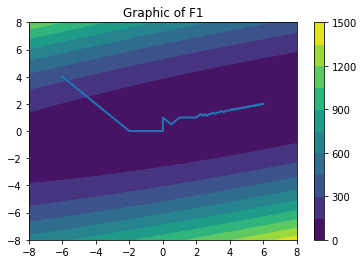

In [21]:
analysis_first_function.plot_graph()

#### Graphic of projection (second function)

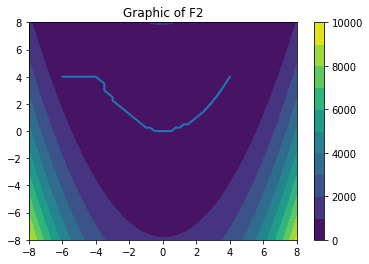

In [22]:
analysis_second_function.plot_graph()